# Prosta wizualizacja filtrów uczących

Model do wizaualizacji __ResNet50__

artykuł: [link](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/)

![model](https://i.stack.imgur.com/gI4zT.png)

In [2]:
# load vgg model
from keras.applications.resnet import ResNet50
# load the model
model = ResNet50()
# summarize the model
model.summary()

Using TensorFlow backend.


102973440/102967424 [==============================] - 19s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________

## Wyciągnięcie samych warstw konwolucyjnych

In [3]:
from matplotlib import pyplot
for layer in model.layers:
	# check for convolutional layer
	if '_conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv1_conv (7, 7, 3, 64)
conv2_block1_1_conv (1, 1, 64, 64)
conv2_block1_2_conv (3, 3, 64, 64)
conv2_block1_0_conv (1, 1, 64, 256)
conv2_block1_3_conv (1, 1, 64, 256)
conv2_block2_1_conv (1, 1, 256, 64)
conv2_block2_2_conv (3, 3, 64, 64)
conv2_block2_3_conv (1, 1, 64, 256)
conv2_block3_1_conv (1, 1, 256, 64)
conv2_block3_2_conv (3, 3, 64, 64)
conv2_block3_3_conv (1, 1, 64, 256)
conv3_block1_1_conv (1, 1, 256, 128)
conv3_block1_2_conv (3, 3, 128, 128)
conv3_block1_0_conv (1, 1, 256, 512)
conv3_block1_3_conv (1, 1, 128, 512)
conv3_block2_1_conv (1, 1, 512, 128)
conv3_block2_2_conv (3, 3, 128, 128)
conv3_block2_3_conv (1, 1, 128, 512)
conv3_block3_1_conv (1, 1, 512, 128)
conv3_block3_2_conv (3, 3, 128, 128)
conv3_block3_3_conv (1, 1, 128, 512)
conv3_block4_1_conv (1, 1, 512, 128)
conv3_block4_2_conv (3, 3, 128, 128)
conv3_block4_3_conv (1, 1, 128, 512)
conv4_block1_1_conv (1, 1, 512, 256)
conv4_block1_2_conv (3, 3, 256, 256)
conv4_block1_0_conv (1, 1, 512, 1024)
conv4_block1_3_conv (1, 1,

conv1_conv (7, 7, 3, 64)


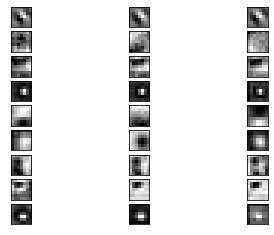

conv2_block1_2_conv (3, 3, 64, 64)


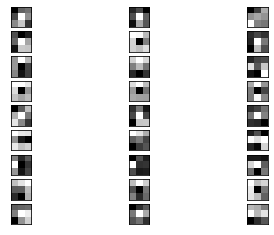

In [15]:
def show(filters):
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    # plot first few filters
    n_filters, ix = 9, 1
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(3):
            # specify subplot and turn of axis
            ax = pyplot.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(f[:, :, j], cmap='gray')
            ix += 1
    # show the figure
    pyplot.show()

# 3x3
filters, biases = model.layers[2].get_weights()
print(model.layers[2].name, filters.shape)
show(filters)

# 3x3
filters, biases = model.layers[10].get_weights()
print(model.layers[10].name, filters.shape)
show(filters)

## Można zauważyć że w pierwszej wastwtie skupiamy się na środku obrazku

Filtórw jest 64 my tutaj pokazujemy tylko 9 pierwszych z poszczególnych warstw